### Imports necessários

In [1]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from datetime import datetime
import matplotlib.pyplot as plt
import tensorflow as tf

### Carregar ficheiros utilizados

In [2]:

%run helpers/cnnCreator.py

### Carregar imagens

In [3]:
# Normalize pixel values to be between 0 and 1
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train',
                                                target_size = (64, 64),
                                                class_mode='categorical',
                                                batch_size=32,
                                                color_mode='rgb')
val_set = val_datagen.flow_from_directory('dataset/valid',
                                                target_size = (64, 64),
                                                class_mode='categorical',
                                                batch_size=32,
                                                color_mode='rgb')
test_set = test_datagen.flow_from_directory('dataset/test',
                                                target_size = (64, 64),
                                                class_mode='categorical',
                                                batch_size=32,
                                                color_mode='rgb')
                                                 

Found 35215 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.


In [7]:
print(test_set[0][1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


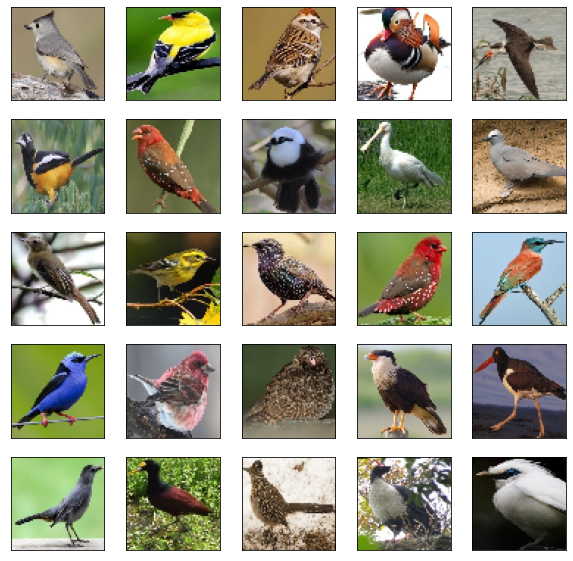

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_set[0][0][i])
plt.show()

### Criar CNN e ajustar o modelo

In [4]:
cnn = cnnCreate()
cnn.fit(training_set, epochs = 1, validation_data = val_set) 

TypeError: fit() got an unexpected keyword argument 'generator'

### Prever a espécie de um pássaro

In [35]:
test_image = test_set[0][0]
result = cnn.predict_on_batch(test_image)
#print(test_image)
print(result)


[[-11.995932 ]
 [-10.38725  ]
 [-10.349978 ]
 [ -9.762027 ]
 [ -8.505226 ]
 [ -9.376676 ]
 [-10.540579 ]
 [ -6.304142 ]
 [ -8.910287 ]
 [ -7.896858 ]
 [ -6.90518  ]
 [-10.268407 ]
 [-11.164172 ]
 [-11.62308  ]
 [ -8.9113035]
 [-11.006711 ]
 [-13.55193  ]
 [-11.471266 ]
 [-11.381228 ]
 [ -9.538211 ]
 [-10.29423  ]
 [-12.1123495]
 [-10.040797 ]
 [ -8.87071  ]
 [-10.920639 ]
 [ -8.887784 ]
 [-11.642179 ]
 [-11.371748 ]
 [-13.274265 ]
 [-12.34189  ]
 [-11.5333605]
 [-12.375529 ]]
1.0


In [38]:
print(test_set[0][1][2])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
print(test_set.indices)

AttributeError: 'DirectoryIterator' object has no attribute 'indices'